In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import bars
import c
import d
import labels
import signals
import u

# Fractional Differentation

<AxesSubplot:xlabel='Date'>

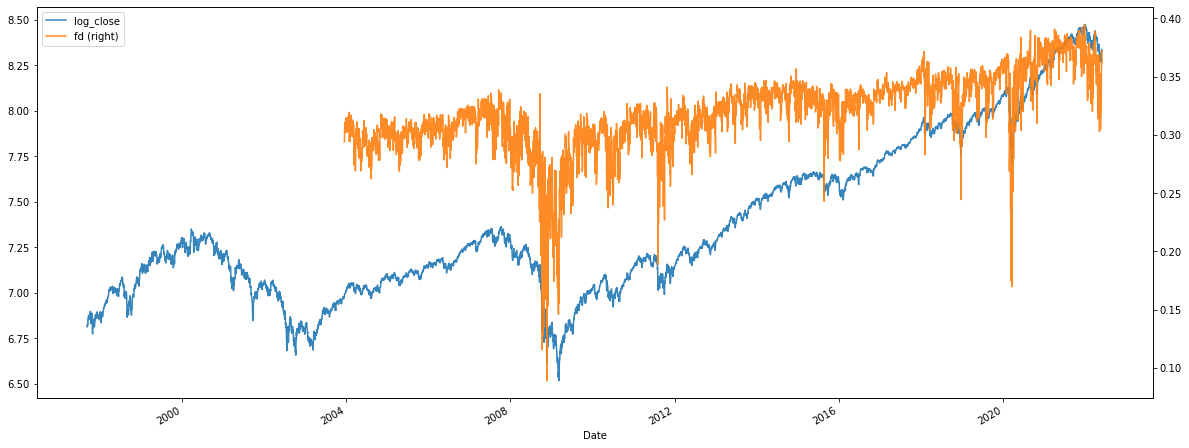

In [3]:
plt.rcParams["figure.figsize"] = (20, 5)

data = d.fetch("data/future/daily", "ES.csv")
data["log_close"] = np.log(data["Close"])
fd, derivative, p_value = signals.get_minimally_fractional_differentiated_series(
    data["log_close"]
)
data["fd"] = fd
data[["log_close", "fd"]].plot(secondary_y="fd", figsize=(20, 8), alpha=0.9)

In [4]:
f"d: {derivative:.2f}, p-value: {p_value:.4f}"

'd: 0.38, p-value: 0.0097'

In [6]:
data["fd"].corr(data["Close"])

0.7691983136034388

In [7]:
import statsmodels.stats.stattools as st

s, p, _, _ = st.jarque_bera(data["fd"].dropna())
f"Test Statistic: {s:.2f}, p-value {p}"

'Test Statistic: 3912.82, p-value 0.0'

<AxesSubplot:>

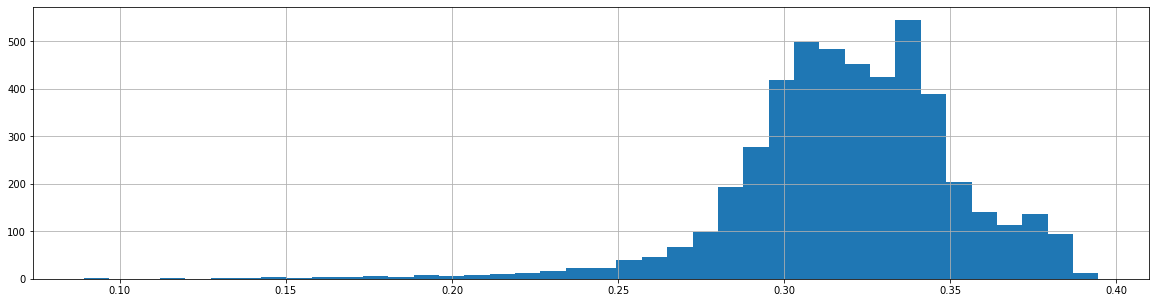

In [8]:
data["fd"].hist(bins=40)